In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import kagglehub

# kaggle資料集
path = kagglehub.dataset_download("cedricaubin/ai-ml-salaries")
# ===============================
# 1. 讀取與清理資料
# ===============================
csv_filename = "salaries.csv"
csv_path = os.path.join(path, csv_filename)

# 讀取 CSV
df = pd.read_csv(csv_path)
df

100%|██████████| 476k/476k [00:00<00:00, 54.7MB/s]

Extracting files...


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
1,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
2,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
3,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
4,2025,SE,FT,Engineer,143000,USD,143000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
73143,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
73144,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
73145,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
73146,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73148 entries, 0 to 73147
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           73148 non-null  int64 
 1   experience_level    73148 non-null  object
 2   employment_type     73148 non-null  object
 3   job_title           73148 non-null  object
 4   salary              73148 non-null  int64 
 5   salary_currency     73148 non-null  object
 6   salary_in_usd       73148 non-null  int64 
 7   employee_residence  73148 non-null  object
 8   remote_ratio        73148 non-null  int64 
 9   company_location    73148 non-null  object
 10  company_size        73148 non-null  object
dtypes: int64(4), object(7)
memory usage: 6.1+ MB


In [3]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [4]:
#company_size資料型態轉換
dic={'S':0,'M':1,'L':2}
df['company_size']=df['company_size'].map(dic)
df


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,1
1,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,1
2,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,1
3,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,1
4,2025,SE,FT,Engineer,143000,USD,143000,US,0,US,1
...,...,...,...,...,...,...,...,...,...,...,...
73143,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,2
73144,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,2
73145,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,0
73146,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,2


In [5]:
#刪除用不到的欄位
df=df.drop('employee_residence',axis=1)
df=df.drop('company_location',axis=1)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_size
0,2025,SE,FT,Data Product Owner,170000,USD,170000,0,1
1,2025,SE,FT,Data Product Owner,110000,USD,110000,0,1
2,2025,SE,FT,Data Product Owner,170000,USD,170000,0,1
3,2025,SE,FT,Data Product Owner,110000,USD,110000,0,1
4,2025,SE,FT,Engineer,143000,USD,143000,0,1
...,...,...,...,...,...,...,...,...,...
73143,2020,SE,FT,Data Scientist,412000,USD,412000,100,2
73144,2021,MI,FT,Principal Data Scientist,151000,USD,151000,100,2
73145,2020,EN,FT,Data Scientist,105000,USD,105000,100,0
73146,2020,EN,CT,Business Data Analyst,100000,USD,100000,100,2


In [6]:
#dense排名數字連續
df['rank'] = df['salary_in_usd'].rank(method='dense',ascending=False).astype(int)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_size,rank
0,2025,SE,FT,Data Product Owner,170000,USD,170000,0,1,2570
1,2025,SE,FT,Data Product Owner,110000,USD,110000,0,1,4723
2,2025,SE,FT,Data Product Owner,170000,USD,170000,0,1,2570
3,2025,SE,FT,Data Product Owner,110000,USD,110000,0,1,4723
4,2025,SE,FT,Engineer,143000,USD,143000,0,1,3436
...,...,...,...,...,...,...,...,...,...,...
73143,2020,SE,FT,Data Scientist,412000,USD,412000,100,2,80
73144,2021,MI,FT,Principal Data Scientist,151000,USD,151000,100,2,3160
73145,2020,EN,FT,Data Scientist,105000,USD,105000,100,0,4925
73146,2020,EN,CT,Business Data Analyst,100000,USD,100000,100,2,5138


In [7]:
df_sorted = df.sort_values(by='rank', ascending=True)
df_sorted.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_size,rank
59418,2024,MI,FT,AI Architect,800000,USD,800000,100,1,1
60261,2024,EN,FT,Data Analyst,774000,USD,774000,0,1,2
62422,2024,MI,FT,Machine Learning Scientist,750000,USD,750000,0,1,3
63020,2023,MI,FT,Machine Learning Scientist,750000,USD,750000,0,1,3
64112,2023,SE,FT,Data Scientist,750000,USD,750000,0,1,3


<Figure size 1000x600 with 0 Axes>

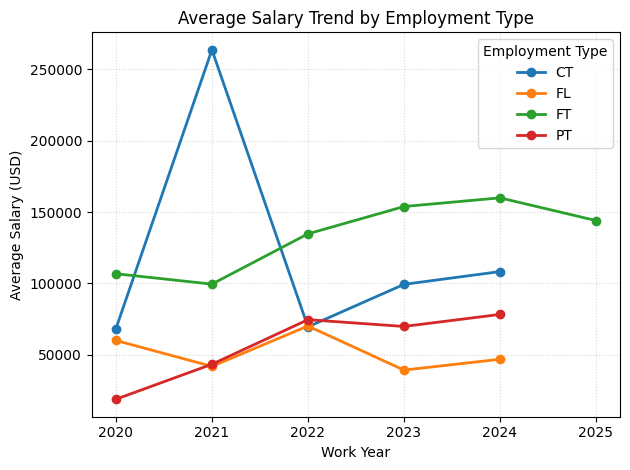

In [8]:
# 1. 依工作年份與聘僱類型計算平均薪資
employment_yearly = df.groupby(['work_year', 'employment_type'])['salary_in_usd'].mean().unstack()
# 2. 繪製折線圖
plt.figure(figsize=(10, 6))
employment_yearly.plot(marker='o', linewidth=2)
plt.title('Average Salary Trend by Employment Type')
plt.xlabel('Work Year')
plt.ylabel('Average Salary (USD)')
plt.grid(True, linestyle=':', alpha=0.5)
plt.xticks(employment_yearly.index)  # 確保年份完整顯示
plt.legend(title='Employment Type')
plt.tight_layout()
plt.show()

In [9]:
df.to_csv('output.csv', index=False)

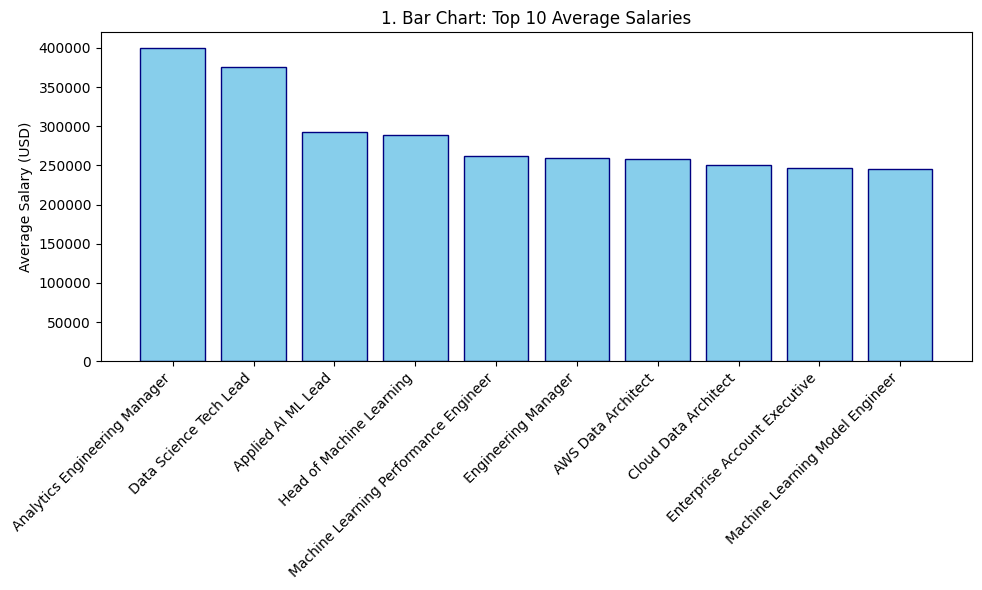

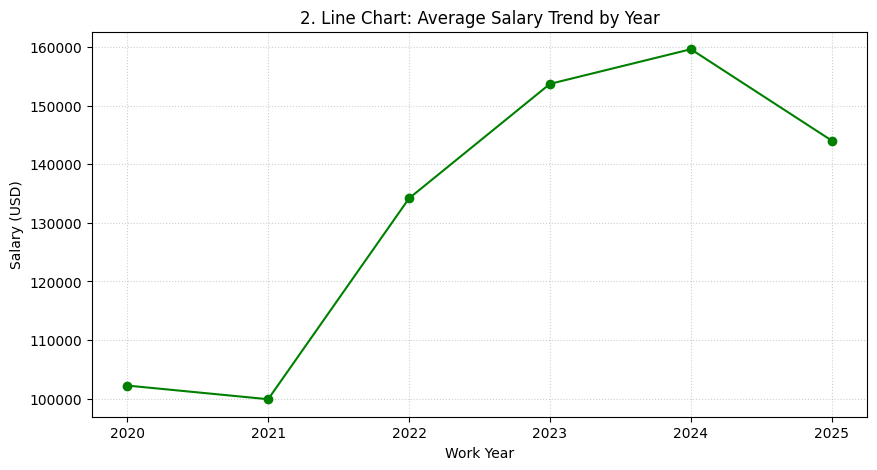

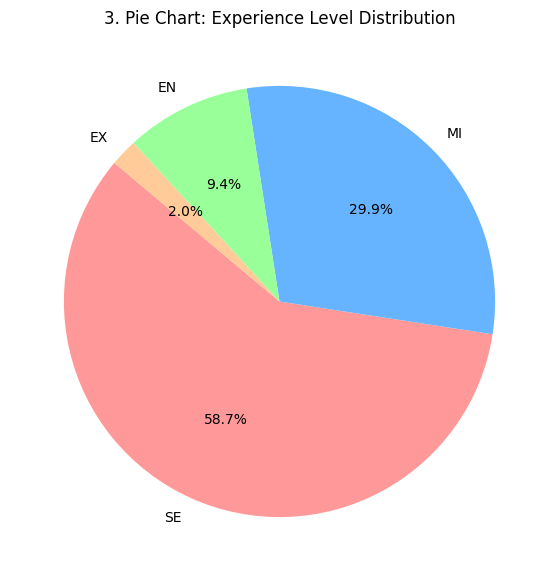

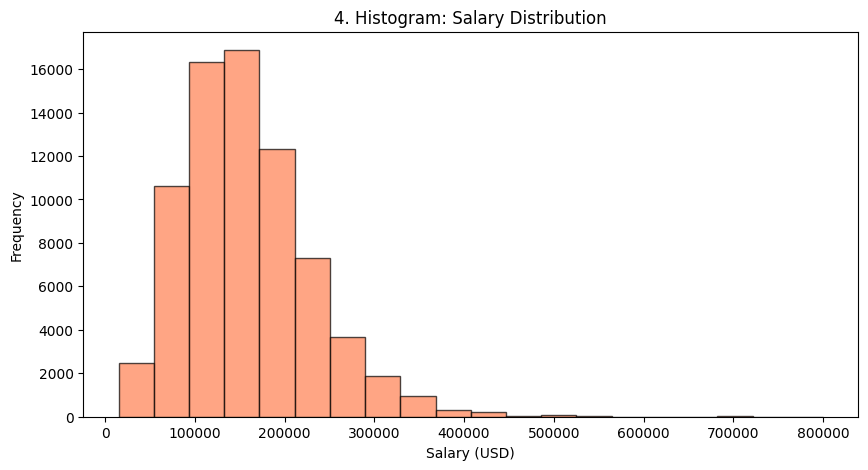

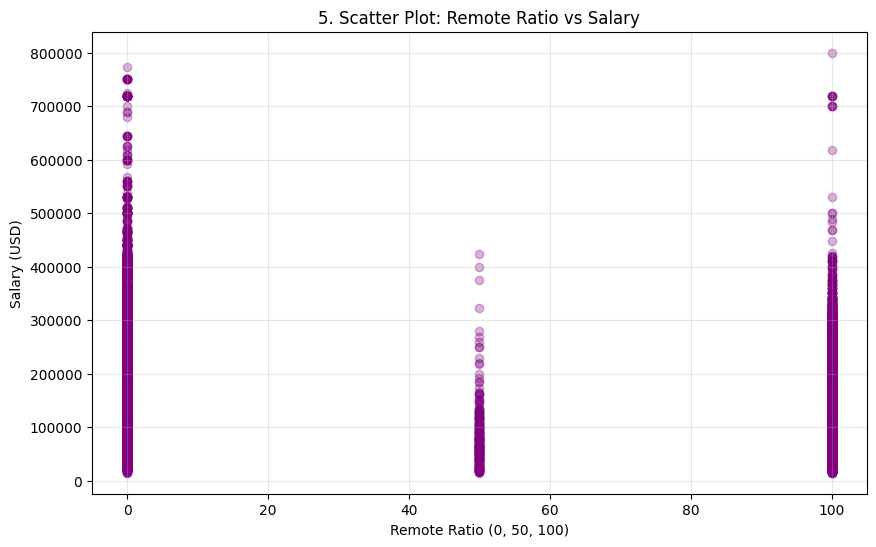

'\n【Top 5 薪資明細表】\nAnalytics Engineering Manager (分析工程經理): $399,880 USD\nData Science Tech Lead (資料科學技術主管): $375,000 USD\nApplied AI ML Lead (應用 AI/ML 主管): $292,500 USD\nHead of Machine Learning (機器學習部門主管): $288,701 USD\nMachine Learning Performance Engineer (高階數據職位): $262,500 USD\n'

In [10]:


# --- (1) 長條圖 (Bar Chart): 比較職位薪資  ---
#Top 10 職位
analysis = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(analysis.index, analysis.values, color='skyblue', edgecolor='navy')
plt.title('1. Bar Chart: Top 10 Average Salaries')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Salary (USD)')
plt.tight_layout()
plt.show()

# --- (2) 折線圖 (Line Chart): 薪資隨年份趨勢  ---
plt.figure(figsize=(10, 5))
yearly_trend = df.groupby('work_year')['salary_in_usd'].mean()
plt.plot(yearly_trend.index, yearly_trend.values, marker='o', linestyle='-', color='green')
plt.title('2. Line Chart: Average Salary Trend by Year')
plt.xlabel('Work Year')
plt.ylabel('Salary (USD)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# --- (3) 圓餅圖 (Pie Chart): 經驗等級分佈  ---
plt.figure(figsize=(7, 7))
exp_counts = df['experience_level'].value_counts()
plt.pie(exp_counts, labels=exp_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('3. Pie Chart: Experience Level Distribution')
plt.show()

# --- (4) 直方圖 (Histogram): 薪資數值分佈  ---
plt.figure(figsize=(10, 5))
plt.hist(df['salary_in_usd'], bins=20, color='coral', edgecolor='black', alpha=0.7)
plt.title('4. Histogram: Salary Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

# --- (5) 散佈圖 (Scatter Plot): 遠端工作比例與薪資關係  ---
plt.figure(figsize=(10, 6))
plt.scatter(df['remote_ratio'], df['salary_in_usd'], alpha=0.3, color='purple')
plt.title('5. Scatter Plot: Remote Ratio vs Salary')
plt.xlabel('Remote Ratio (0, 50, 100)')
plt.ylabel('Salary (USD)')
plt.grid(True, alpha=0.3)
plt.show()

'''
【Top 5 薪資明細表】
Analytics Engineering Manager (分析工程經理): $399,880 USD
Data Science Tech Lead (資料科學技術主管): $375,000 USD
Applied AI ML Lead (應用 AI/ML 主管): $292,500 USD
Head of Machine Learning (機器學習部門主管): $288,701 USD
Machine Learning Performance Engineer (高階數據職位): $262,500 USD
'''